In [ ]:
# =========================================
# Trie-based Stemming with Prefix & Suffix
# Works directly on PDF dataset (brown_nouns.pdf)
# =========================================

!pip install PyPDF2

import PyPDF2

# ------------------------------
# Step 1: Extract words from PDF
# ------------------------------
def extract_words_from_pdf(pdf_path):
    words = []
    with open(pdf_path, "rb") as f:
        reader = PyPDF2.PdfReader(f)
        for page in reader.pages:
            text = page.extract_text()
            if text:
                for token in text.split():
                    token = token.strip().lower()
                    if token.isalpha():   # keep only alphabetic words
                        words.append(token)
    return words

words = extract_words_from_pdf("brown_nouns.pdf")
print("✅ Total words extracted:", len(words))
print("Sample:", words[:20])

# Save all words into output.txt
with open("output.txt", "w") as f:
    for w in words:
        f.write(w + "\n")
print("✅ Saved all words into output.txt")


# ------------------------------
# Step 2: Trie Implementation
# ------------------------------
class TrieNode:
    def __init__(self):
        self.children = {}
        self.is_end = False
        self.freq = 0   # frequency of words passing through this node

class Trie:
    def __init__(self):
        self.root = TrieNode()

    def insert(self, word):
        node = self.root
        for ch in word:
            if ch not in node.children:
                node.children[ch] = TrieNode()
            node = node.children[ch]
            node.freq += 1
        node.is_end = True

    def find_stem_suffix(self, word):
        """
        Find stem+suffix split based on max branching (node with max children).
        """
        node = self.root
        max_branch = -1
        split_index = len(word)  # default = whole word is stem

        for i, ch in enumerate(word):
            if ch not in node.children:
                break
            node = node.children[ch]

            # branching = number of children at this node
            branching = len(node.children)
            if branching > max_branch:
                max_branch = branching
                split_index = i + 1

        stem = word[:split_index]
        suffix = word[split_index:]
        return stem, suffix, max_branch, node.freq


# ------------------------------
# Step 3: Prefix & Suffix Trie Builders
# ------------------------------
def build_prefix_trie(words):
    trie = Trie()
    for w in words:
        trie.insert(w)
    return trie

def build_suffix_trie(words):
    trie = Trie()
    for w in words:
        trie.insert(w[::-1])  # insert reversed
    return trie


# ------------------------------
# Step 4: Process with Prefix & Suffix Tries
# ------------------------------
def process_prefix(words, trie):
    result = []
    for w in words:
        stem, suffix, branch, freq = trie.find_stem_suffix(w)
        result.append(f"{w} = {stem}+{suffix}  (branch={branch}, freq={freq})")
    return result

def process_suffix(words, trie):
    result = []
    for w in words:
        stem, suffix, branch, freq = trie.find_stem_suffix(w[::-1])
        suffix = suffix[::-1]  # reverse back
        stem = w[:len(w)-len(suffix)]
        result.append(f"{w} = {stem}+{suffix}  (branch={branch}, freq={freq})")
    return result


# ------------------------------
# Step 5: Run & Compare
# ------------------------------
prefix_trie = build_prefix_trie(words)
suffix_trie = build_suffix_trie(words)

prefix_results = process_prefix(words, prefix_trie)
suffix_results = process_suffix(words, suffix_trie)

print("\n--- Prefix Trie Results (sample 10) ---")
for line in prefix_results[:10]:
    print(line)

print("\n--- Suffix Trie Results (sample 10) ---")
for line in suffix_results[:10]:
    print(line)

# Compare performance
better_prefix = sum(1 for r in prefix_results if "+" in r)
better_suffix = sum(1 for r in suffix_results if "+" in r)

comparison_summary = [
    "\n--- Stemming Comparison ---",
    f"Prefix Trie gave splits for {better_prefix}/{len(words)} words",
    f"Suffix Trie gave splits for {better_suffix}/{len(words)} words"
]

if better_prefix > better_suffix:
    comparison_summary.append("👉 Prefix Trie works better for stemming.")
elif better_suffix > better_prefix:
    comparison_summary.append("👉 Suffix Trie works better for stemming.")
else:
    comparison_summary.append("👉 Both perform equally well.")


# ------------------------------
# Step 6: Save Full Report
# ------------------------------
with open("report.txt", "w") as f:
    f.write("=== Report on Prefix vs Suffix Trie Stemming ===\n\n")
    f.write("Total Words Extracted: " + str(len(words)) + "\n\n")

    f.write("---- Prefix Trie Results ----\n")
    for line in prefix_results:
        f.write(line + "\n")

    f.write("\n---- Suffix Trie Results ----\n")
    for line in suffix_results:
        f.write(line + "\n")

    f.write("\n".join(comparison_summary) + "\n")

print("✅ Report saved as report.txt")


✅ Total words extracted: 203938
Sample: ['investigation', 'primary', 'election', 'evidence', 'irregularities', 'place', 'jury', 'presentments', 'charge', 'election', 'praise', 'thanks', 'manner', 'election', 'term', 'jury', 'reports', 'irregularities', 'primary', 'handful']
✅ Saved all words into output.txt

--- Prefix Trie Results (sample 10) ---
investigation = in+vestigation  (branch=23, freq=65)
primary = p+rimary  (branch=14, freq=15)
election = e+lection  (branch=22, freq=125)
evidence = e+vidence  (branch=22, freq=207)
irregularities = i+rregularities  (branch=13, freq=8)
place = p+lace  (branch=14, freq=580)
jury = ju+ry  (branch=13, freq=63)
presentments = pre+sentments  (branch=15, freq=1)
charge = c+harge  (branch=14, freq=147)
election = e+lection  (branch=22, freq=125)

--- Suffix Trie Results (sample 10) ---
investigation = in+investigati  (branch=18, freq=44)
primary = p+primar  (branch=22, freq=15)
election = el+electi  (branch=18, freq=115)
evidence = e+evidenc  (branc

⚠ JSON load failed, falling back to line-by-line parsing: Expecting value: line 674695 column 4 (char 15615806)
✅ Total tokens loaded: 1481305
Sample tokens: ['{', 'document_id:', '0', 'original_text:', 'लोगों', 'को', 'बिलों', 'संबंधी', 'सुविधा', 'देना', 'ही', 'उनका', 'काम', 'sentences:', '{', 'text:', 'लोगों', 'को', 'बिलों', 'संबंधी']
✅ Unique words: 47888
✅ Frequency distribution saved to freq_distribution.txt


/tmp/ipython-input-2054410431.py:63: UserWarning: Glyph 2325 (\N{DEVANAGARI LETTER KA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2054410431.py:63: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.tight_layout()
/tmp/ipython-input-2054410431.py:63: UserWarning: Glyph 2375 (\N{DEVANAGARI VOWEL SIGN E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2054410431.py:63: UserWarning: Glyph 2350 (\N{DEVANAGARI LETTER MA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2054410431.py:63: UserWarning: Glyph 2306 (\N{DEVANAGARI SIGN ANUSVARA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2054410431.py:63: UserWarning: Glyph 2368 (\N{DEVANAGARI VOWEL SIGN II}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2054410431.py:63: UserWarning: Glyph 2379 (\N{DEVANAGARI VOWEL SIGN O}) missing from font(s) DejaVu Sans.
  plt.tight_layout(

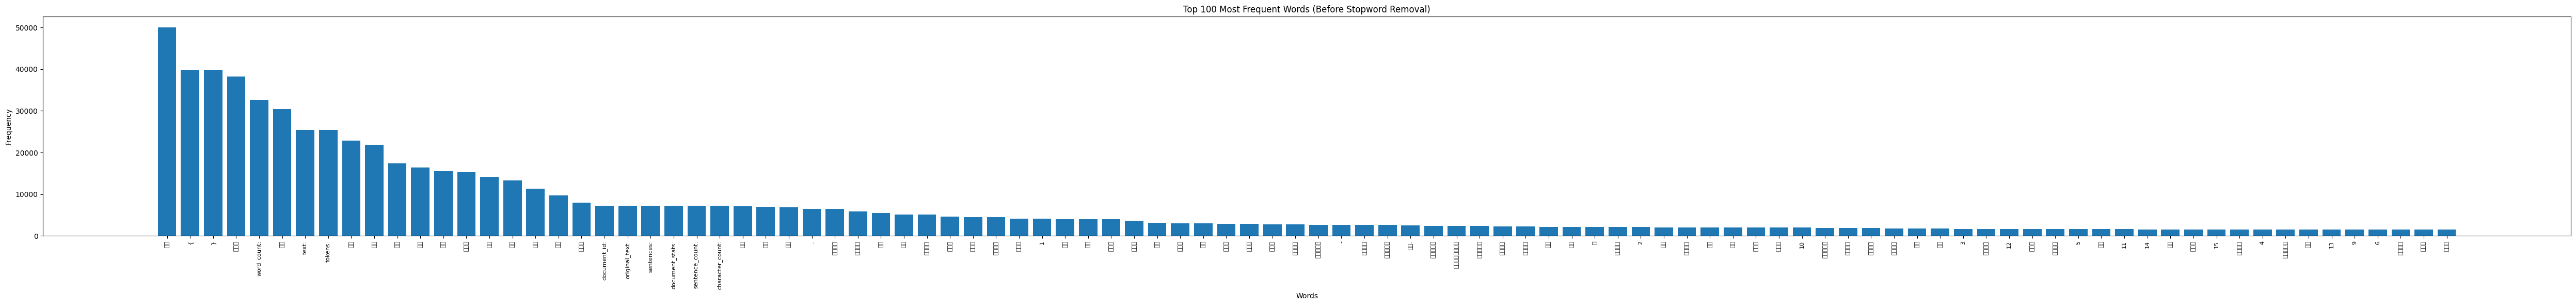

/tmp/ipython-input-2054410431.py:63: UserWarning: Glyph 2343 (\N{DEVANAGARI LETTER DHA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2054410431.py:63: UserWarning: Glyph 2328 (\N{DEVANAGARI LETTER GHA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2054410431.py:63: UserWarning: Glyph 2335 (\N{DEVANAGARI LETTER TTA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2054410431.py:63: UserWarning: Glyph 2310 (\N{DEVANAGARI LETTER AA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2054410431.py:63: UserWarning: Glyph 2370 (\N{DEVANAGARI VOWEL SIGN UU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2054410431.py:63: UserWarning: Glyph 2330 (\N{DEVANAGARI LETTER CA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2054410431.py:63: UserWarning: Glyph 2359 (\N{DEVANAGARI LETTER SSA}) missing from font(s) DejaVu Sans.
  plt.tight_

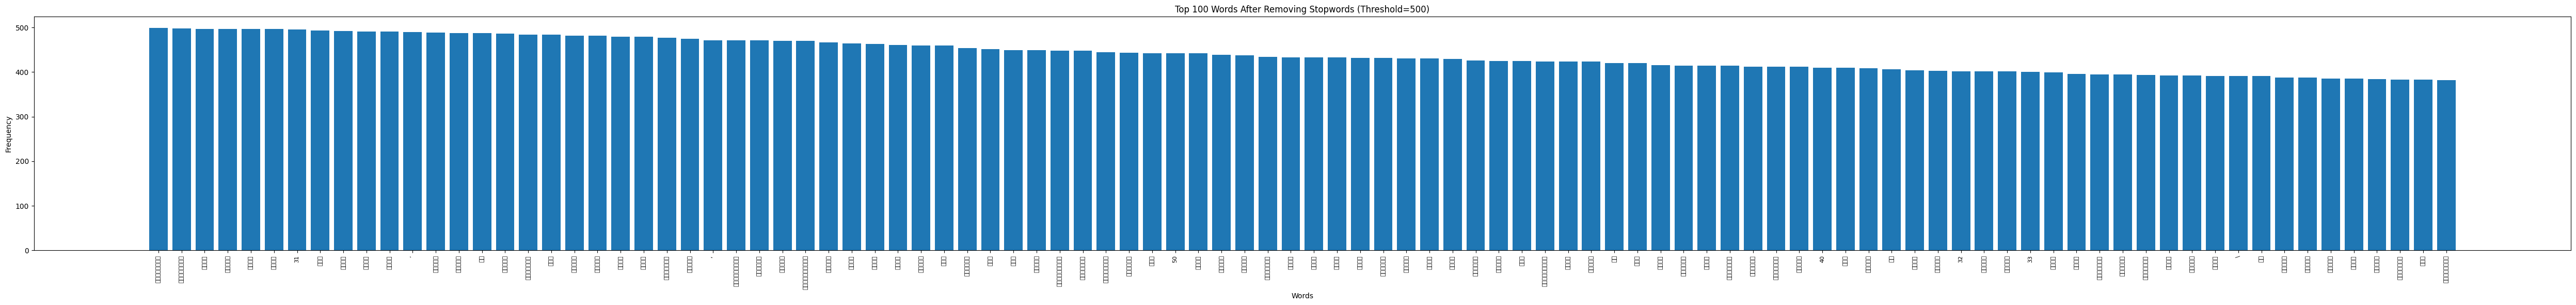

/tmp/ipython-input-2054410431.py:63: UserWarning: Glyph 2320 (\N{DEVANAGARI LETTER AI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2054410431.py:63: UserWarning: Glyph 2336 (\N{DEVANAGARI LETTER TTHA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2054410431.py:63: UserWarning: Glyph 2364 (\N{DEVANAGARI SIGN NUKTA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2054410431.py:64: UserWarning: Glyph 2320 (\N{DEVANAGARI LETTER AI}) missing from font(s) DejaVu Sans.
  plt.savefig(filename, dpi=300)               # high resolution
/tmp/ipython-input-2054410431.py:64: UserWarning: Glyph 2336 (\N{DEVANAGARI LETTER TTHA}) missing from font(s) DejaVu Sans.
  plt.savefig(filename, dpi=300)               # high resolution
/tmp/ipython-input-2054410431.py:64: UserWarning: Glyph 2364 (\N{DEVANAGARI SIGN NUKTA}) missing from font(s) DejaVu Sans.
  plt.savefig(filename, dpi=300)               # high resolution


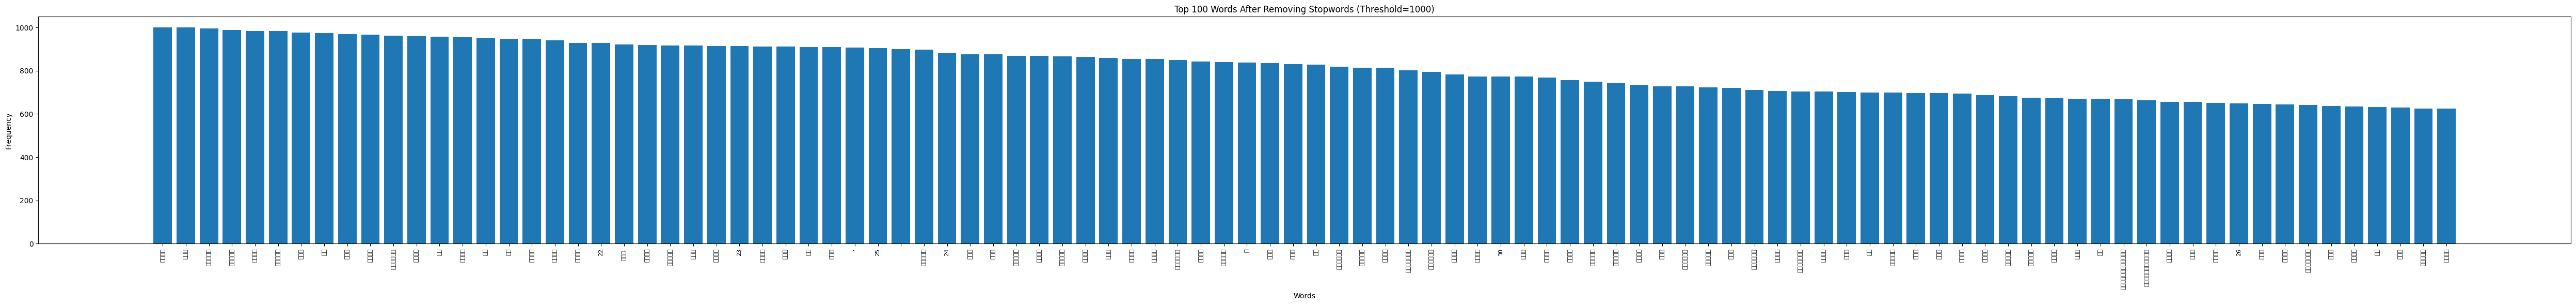

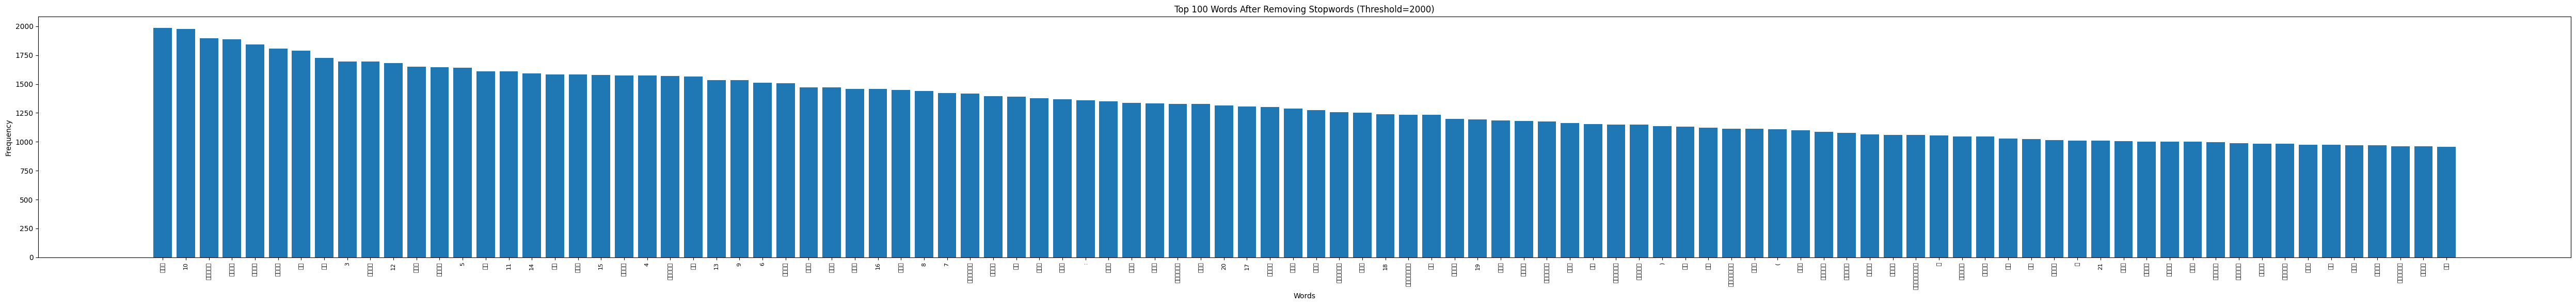

✅ Report saved to report.txt


In [ ]:
# ==========================================
# Assignment: Frequency Distribution & Stopword Removal
# Input: tokenised_data_final.json (may be large/broken)
# ==========================================

import matplotlib.pyplot as plt

# ---------------------------
# Step 1: Load Tokens Safely
# ---------------------------
tokens = []

try:
    # Try standard JSON load first
    import json
    with open("tokenized_data_final.json", "r", encoding="utf-8", errors="ignore") as f:
        data = json.load(f)
    tokens = data["tokens"] if "tokens" in data else data
except Exception as e:
    print("⚠ JSON load failed, falling back to line-by-line parsing:", e)
    with open("tokenized_data_final.json", "r", encoding="utf-8", errors="ignore") as f:
        for line in f:
            line = line.strip().lower().replace('"','').replace(",","").replace("[","").replace("]","")
            if line:
                tokens.extend(line.split())  # split words if multiple per line

print("✅ Total tokens loaded:", len(tokens))
print("Sample tokens:", tokens[:20])


# ---------------------------
# Step 2: Frequency Distribution (manual)
# ---------------------------
freq_dist = {}
for word in tokens:
    if word in freq_dist:
        freq_dist[word] += 1
    else:
        freq_dist[word] = 1

print("✅ Unique words:", len(freq_dist))

# Save frequency distribution to file
with open("freq_distribution.txt", "w", encoding="utf-8") as f:
    for w, c in sorted(freq_dist.items(), key=lambda x: x[1], reverse=True):
        f.write(f"{w}\t{c}\n")
print("✅ Frequency distribution saved to freq_distribution.txt")


# ---------------------------
# Step 3: Plot Top 100 Words
# ---------------------------
def plot_top_words(freq_dict, title, filename, top_n=100):
    sorted_words = sorted(freq_dict.items(), key=lambda x: x[1], reverse=True)[:top_n]
    words, counts = zip(*sorted_words)

    plt.figure(figsize=(max(12, top_n//2), 6))   # dynamic width
    plt.bar(words, counts)
    plt.xticks(rotation=90, fontsize=8)          # rotate + smaller font
    plt.title(title)
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.savefig(filename, dpi=300)               # high resolution
    plt.show()


plot_top_words(freq_dist, "Top 100 Most Frequent Words (Before Stopword Removal)", "top100_before.png")


# ---------------------------
# Step 4: Stopword Removal by Threshold
# ---------------------------
def remove_stopwords(freq_dict, threshold):
    """Remove words occurring more than threshold times"""
    return {w: c for w, c in freq_dict.items() if c <= threshold}

# Example thresholds (adjust if dataset is huge)
thresholds = [500, 1000, 2000]

report_lines = []
for t in thresholds:
    reduced = remove_stopwords(freq_dist, t)
    report_lines.append(f"Threshold {t}: {len(freq_dist)-len(reduced)} stopwords removed, {len(reduced)} words remain.")
    plot_top_words(reduced, f"Top 100 Words After Removing Stopwords (Threshold={t})", f"top100_after_{t}.png")


# ---------------------------
# Step 5: Save Report
# ---------------------------
with open("report.txt", "w", encoding="utf-8") as f:
    f.write("=== Word Frequency & Stopword Removal Report ===\n\n")
    f.write(f"Total tokens: {len(tokens)}\n")
    f.write(f"Unique words: {len(freq_dist)}\n\n")

    f.write("Stopword Removal Summary:\n")
    for line in report_lines:
        f.write(line + "\n")

print("✅ Report saved to report.txt")
